## Working with patient datasets

This notebook provides an introduction to working with patient datasets in `scikit-rt`, using the dataset:

Peihan Li, "SPECT_CT_data.zip", Figshare dataset (2020)  
https://doi.org/10.6084/m9.figshare.12579707.v1

**Note:** If not already present on the computer where this notebook is run, the dataset will be downloaded to the directory specified by `topdir` in the
first code cell below.  The download file has a size of 1.6 GB, so download may take a while.

## Module import and data download

The following imports modules needed in this notebook, defines the path
to the data directory, downloads the example dataset if not already present, obtains the list of paths to patient folders, and sets some viewer options.

In [1]:
from pathlib import Path
from skrt import BetterViewer, Patient
from skrt.core import (alphanumeric, compress_user, download,
                       get_n_file_below, print_paths, Defaults)

# Define URL of source dataset, and local data directory.
url = "https://figshare.com/ndownloader/files/23528954/SPECT_CT_data.zip"
topdir = Path("~/data/spect_ct").expanduser()
datadir = topdir / Path(url).stem

# Download dataset if not already present.
if not datadir.exists():
    download(url, topdir, unzip=True)
    
# Obtain sorted list of paths to patient folders.
paths = sorted(list(datadir.glob("0*")))

# In place of interactive images, display static graphics that can be saved with notebook.
# Defaults().no_ui = True
# Omit user part of paths when printing object attributes.
# Defaults().compress_user = True

## Unsorted DICOM data

Each element of the list `paths` identifies a folder containing unsorted DICOM data for a single patient.  For the element referenced by the index `idx`, the code below prints the number of files in the folder and all subfolders, and lists file paths.

The organisation and naming conventions used when exporting DICOM files can vary between systems.  The file paths may give little indication of the type of data that the files contain.

In [2]:
# Index of folder path for which information is to be printed.
idx = 4
print(f"Number of files: {get_n_file_below(paths[idx])}")

# Number of paths below folder for which information is
# to be printed.  Counting is from the start of the list
# if positive, or from the end of the list if negative.
max_path1 = -10
print_paths(paths[idx], max_path=max_path1)

Number of files: 219
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10073.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10074.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10075.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10076.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10077.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10078.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10079.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10080.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10081.dcm
~/data/spect_ct/SPECT_CT_data/005/000002/phase2/10082.dcm


The code below demonstrates how to read unsorted DICOM data, and print the study attributes. The output shows the images, structure sets, doses, plans in each study.  The attributes include a number of unique identifiers (UIDs), used in the data sorting, and in linking related data.  In a future release of `scikit-rt`, these may be deleted or hidden once the sorting is completed. 

In [3]:
# Read unsorted DICOM data.
p1 = Patient(paths[idx], unsorted_dicom=True)

# Print study attributes.
print(p1.get_studies())

[
Study
{
  ct_doses: [12 * <class 'skrt.dose.Dose'>] 
  ct_images: [1 * <class 'skrt.image.Image'>] 
  ct_plans: [2 * <class 'skrt.dose.Plan'>] 
  ct_structure_sets: [2 * <class 'skrt.structures.StructureSet'>] 
  date: '20120516' 
  dose_types: {1 * keys of type <class 'str'>} 
  files: [] 
  frame_of_reference_uid: '1.2.840.113619.2.81.290.9174.20120516164723.9225.1960.1.2' 
  image_types: {1 * keys of type <class 'str'>} 
  modality: 'ct' 
  path: '' 
  patient: <class 'skrt.patient.Patient'> 
  plan_types: {1 * keys of type <class 'str'>} 
  print_depth: 0 
  referenced_image_sop_instance_uid: None 
  referenced_plan_sop_instance_uid: None 
  referenced_structure_set_sop_instance_uid: None 
  series_instance_uid: '1.2.840.113619.2.81.290.9174.12943.2.20120516.264810' 
  series_number: '2' 
  sop_instance_uid: '1.2.840.113619.2.81.290.9174.12943.2.1.20120516.264903' 
  structure_set_types: {1 * keys of type <class 'str'>} 
  study_instance_uid: '1.2.840.113619.2.81.290.9174.12943.2

## Sorted DICOM data

Once unsorted DICOM data have been read, the data may be copied out grouped by type, following a file organisation originally developed for the VoxTox study ([https://doi.org/10.1088/1742-6596/898/7/072048](https://doi.org/10.1088/1742-6596/898/7/072048)(.

Warnings about missing DICOM tags may be produced during copying, but can be ignored.

In [4]:
# Path to folder to which sorted DICOM data are to be copied.
sorted_dir = Path("sorted_dicom")

# Copy patient's DICOM data.
p1.copy_dicom(sorted_dir)

Patient position: HFS
Patient position: HFS
Patient position: HFS
Patient position: HFS


If the unsorted data contain duplicate files, with different paths, only one copy will be retained after sorting.  As a result, the number of files after sorting may be lower the number of files before sorting.

File paths after sorting give an indication of the type of data that a file contains.  Imaging data are grouped first by modality and then by timestamp and series number.  Other data are grouped first by type, then by the characteristics (first modality, then timestamp and series number) of linked imaging data.

In [5]:
# Print number of files after sorting.
print(f"Number of files: {get_n_file_below(sorted_dir / p1.id)}")

# Print paths of sorted files.
max_path2 = max_path1
print_paths(sorted_dir / p1.id, max_path=max_path2)

Number of files: 145
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/CT/20120521_113035_001/49.dcm
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/CT/20120521_113035_001/50.dcm
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/CT/20120521_113035_001/51.dcm
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/CT/20120521_113035_001/52.dcm
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/CT/20120521_113035_001/53.dcm
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/NM
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/NM/20120521_113347_001
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/NM/20120521_113347_001/1.dcm
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/NM/20120521_123018_002
~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242/NM/20120521

If the sorted data are read, the studies, as they should, have the same images, structure sets, doses, plans as the unsorted data.  For sorted data, grouping of files and data linking is based on the file organisation, and UIDs aren't present among the study attributes.

In [6]:
# Read sorted DICOM data.
p2 = Patient(sorted_dir / p1.id)

# Print study attributes.
print(p2.get_studies())

[
Study
{
  ct_doses: [12 * <class 'skrt.dose.Dose'>] 
  ct_images: [1 * <class 'skrt.image.Image'>] 
  ct_plans: [2 * <class 'skrt.dose.Plan'>] 
  ct_structure_sets: [2 * <class 'skrt.structures.StructureSet'>] 
  date: '20120516' 
  dose_types: {1 * keys of type <class 'str'>} 
  files: [4 * <class 'skrt.core.File'>] 
  image_types: {1 * keys of type <class 'str'>} 
  path: ~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120516_164723 
  patient: <class 'skrt.patient.Patient'> 
  plan_types: {1 * keys of type <class 'str'>} 
  print_depth: 0 
  structure_set_types: {1 * keys of type <class 'str'>} 
  subdir: '' 
  time: '164723' 
  timestamp: '20120516_164723' 
}, 
Study
{
  ct_images: [1 * <class 'skrt.image.Image'>] 
  date: '20120521' 
  files: [2 * <class 'skrt.core.File'>] 
  image_types: {2 * keys of type <class 'str'>} 
  nm_images: [2 * <class 'skrt.image.Image'>] 
  path: ~/codeshare/scikit-rt/examples/notebooks/sorted_dicom/005/20120521_104242 
  patient: <class

## Accessing data objects

The images, structure sets, doses and plans associated with a patient (across all studies) or with a single study can be accessed with the methods:

```
get_images()
get_structure_sets()
get_doses()
get_plans()
```

It's possible to require that the data objects returned relate to one or more imaging modalities, or that the objects be linked to other types of data object.  Examples are given in the code below.

In [7]:
# Print attributes of all image objects.
print(p1.get_images())

[
Image
{
  affine: (4, 4) array 
  data: (512, 512, 74) array 
  date: '20120516' 
  default_intensity: (-200, 300) 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  dicom_paths: [148 * <class 'str'>] 
  doses: [12 * <class 'skrt.dose.Dose'>] 
  downsampling: None 
  files: [148 * <class 'skrt.core.File'>] 
  frame_of_reference_uid: '1.2.840.113619.2.81.290.9174.20120516164723.9225.1960.1.2' 
  image_extent: [3 * <class 'tuple'>] 
  image_size: [3 * <class 'numpy.float64'>] 
  lims: [3 * <class 'tuple'>] 
  log_level: 'WARNING' 
  logger: <Logger Image (WARNING)> 
  modality: 'ct' 
  n_voxels: [3 * <class 'int'>] 
  nifti_array: False 
  origin: [3 * <class 'numpy.float64'>] 
  path: '' 
  patient: <class 'skrt.patient.Patient'> 
  plans: [2 * <class 'skrt.dose.Plan'>] 
  plot_extent: {6 * keys of type <class 'str'>} 
  print_depth: 0 
  referenced_image_sop_instance_uid: None 
  referenced_plan_sop_instance_uid: None 
  referenced_structure_set_sop_instance_uid: None 
  rgb_

In [8]:
# Print attributes of all images of modality "ct".
print(p1.get_images("ct"))

[
Image
{
  affine: (4, 4) array 
  data: (512, 512, 74) array 
  date: '20120516' 
  default_intensity: (-200, 300) 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  dicom_paths: [148 * <class 'str'>] 
  doses: [12 * <class 'skrt.dose.Dose'>] 
  downsampling: None 
  files: [148 * <class 'skrt.core.File'>] 
  frame_of_reference_uid: '1.2.840.113619.2.81.290.9174.20120516164723.9225.1960.1.2' 
  image_extent: [3 * <class 'tuple'>] 
  image_size: [3 * <class 'numpy.float64'>] 
  lims: [3 * <class 'tuple'>] 
  log_level: 'WARNING' 
  logger: <Logger Image (WARNING)> 
  modality: 'ct' 
  n_voxels: [3 * <class 'int'>] 
  nifti_array: False 
  origin: [3 * <class 'numpy.float64'>] 
  path: '' 
  patient: <class 'skrt.patient.Patient'> 
  plans: [2 * <class 'skrt.dose.Plan'>] 
  plot_extent: {6 * keys of type <class 'str'>} 
  print_depth: 0 
  referenced_image_sop_instance_uid: None 
  referenced_plan_sop_instance_uid: None 
  referenced_structure_set_sop_instance_uid: None 
  rgb_

In [9]:
# Print attributes of all images of modality "ct"
# that have associated structure set(s) and dose(s).
print(p1.get_images("ct", ["structure_sets", "doses"]))

[
Image
{
  affine: (4, 4) array 
  data: (512, 512, 74) array 
  date: '20120516' 
  default_intensity: (-200, 300) 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  dicom_paths: [148 * <class 'str'>] 
  doses: [12 * <class 'skrt.dose.Dose'>] 
  downsampling: None 
  files: [148 * <class 'skrt.core.File'>] 
  frame_of_reference_uid: '1.2.840.113619.2.81.290.9174.20120516164723.9225.1960.1.2' 
  image_extent: [3 * <class 'tuple'>] 
  image_size: [3 * <class 'numpy.float64'>] 
  lims: [3 * <class 'tuple'>] 
  log_level: 'WARNING' 
  logger: <Logger Image (WARNING)> 
  modality: 'ct' 
  n_voxels: [3 * <class 'int'>] 
  nifti_array: False 
  origin: [3 * <class 'numpy.float64'>] 
  path: '' 
  patient: <class 'skrt.patient.Patient'> 
  plans: [2 * <class 'skrt.dose.Plan'>] 
  plot_extent: {6 * keys of type <class 'str'>} 
  print_depth: 0 
  referenced_image_sop_instance_uid: None 
  referenced_plan_sop_instance_uid: None 
  referenced_structure_set_sop_instance_uid: None 
  rgb_

## Viewing data objects

Images, structure sets and doses can be viewed interactively using the `BetterViewer` class, for example:

```
structure_set = p1.get_structure_sets("ct")[0]
image = structure_set.get_image()
BetterViewer(images=[image], rois=[structure_set])
```

If more than one image is passed as argument, the images are displayed side by side.

Images, structure sets and doses have a `view()` method, which creates a `BetterViewer` instance, passing the calling object as argument, for example:

```
image.view(rois=structure_set)
```

The code below shows how to view an image without and with structure set superimposed.  Further demonstrations of plotting capabilities can be found in [plotting_demo.ipynb](https://github.com/scikit-rt/scikit-rt/blob/master/examples/notebooks/plotting_demo.ipynb).

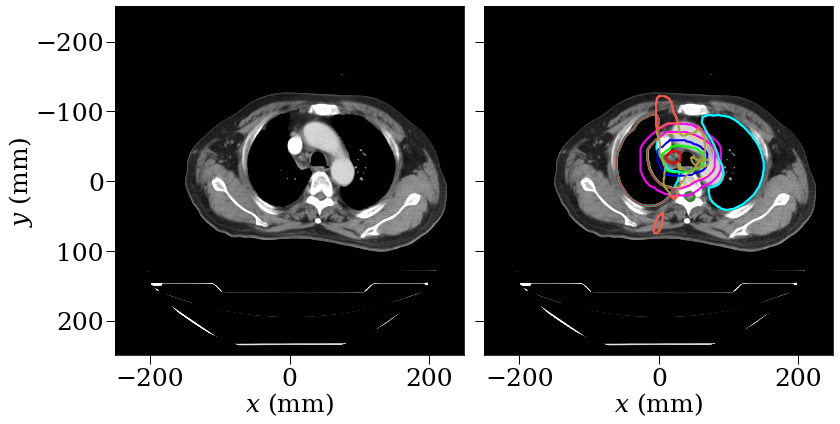

In [10]:
# Obtain structure set associated with an image of modality "ct".
structure_set = p1.get_structure_sets("ct")[0]

# Obtain the (single) structure set associated with the image.
image = structure_set.get_image()

# View image, without and with structure set superimposed.
image.view(images=image, rois=[None, structure_set]);

## Filtering structure sets and standardising ROI names

When working with structure sets, it can be useful to filter so as to have only ROIs relevant to an anlysis.  The same ROI may be labelled differently in different structure sets, so standardising names can also be useful.  A new structure set can be obtained, with the original left unaltered.

ROI filtering and renaming is demonstrated below.

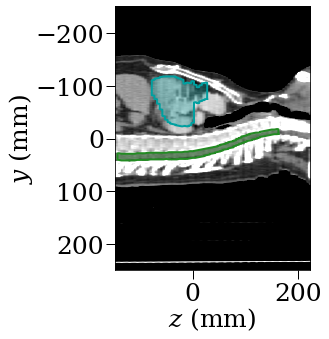

In [11]:
# Define ROI naming scheme.
# Dictionary keys are the names to be assigned.
# Dictionary values indicate the labels that may originally have been used.
# Each value may be a single string or a list of strings, wild cards
# may be used, and the matching with the original labels is case insensitive.
roi_names = {
    "heart": "heart",
    "lung_left": "lung_l*",
    "lung_right": "lung_r*",
    "spinal_cord": ["cord*", "spinal*"],
}

# Create filtered copy of structure set, standardising ROI names.
filtered_structure_set = p1.get_structure_sets("ct")[0].filtered_copy(
    names=roi_names, keep_renamed_only=True)

# View the filtered structure set, underlaying associated image (default).
# The initial view is set to be the "z-y" plane, centring on
# the spinal cord, and the ROI plot type is set to "filled".
filtered_structure_set.view(init_view="z-y", init_roi="spinal_cord",
                            roi_plot_type="filled", include_image=True);                                                           